![alt text](https://trello-attachments.s3.amazonaws.com/56b4dc9a5618cc0446578ec6/5c6ffc4673fc7e8ac0a66708/c5f7d8d143f69ffd6683d6ad5b72c58f/Machine-Learning-e-Ciência-de-dados-nas-apostas-esportivas.png)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://www.youtube.com/watch?v=J4Wdy0Wc_xQ

https://www.youtube.com/watch?v=nyxTdL_4Q-Q&t=1s

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

https://maelfabien.github.io/machinelearning/GridRand/#

https://www.youtube.com/watch?v=yIYKR4sgzI8&t=232s

https://www.youtube.com/watch?v=vN5cNN2-HWE&t=0s

https://www.youtube.com/watch?v=BfKanl1aSG0

https://www.youtube.com/watch?v=xxFYro8QuXA

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
# Importa Bibliotecas
import pickle
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
#Setting Pandas to show all columns
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
data = pd.read_csv('class_data.csv', sep = ';')

In [3]:
data.head()

,date,home_team,away_team,home_score,away_score,home_ball_possession,away_ball_possession,home_goal_attempts,away_goal_attempts,home_shots_on_goal,away_shots_on_goal,home_shots_off_goal,away_shots_off_goal,home_blocked_shots,away_blocked_shots,home_corner_kicks,away_corner_kicks,home_offsides,away_offsides,home_goalkeeper_saves,away_goalkeeper_saves,home_fouls,away_fouls,home_yellow_cards,away_yellow_cards,home_goals_diff,away_goals_diff,home_5goals_diff,away_5goals_diff,result,home_goals_shots,away_goals_shots,home_elo,away_elo
0,2017-09-23,Bolton,Brentford,0,3,43,57,10,22,3,10,5,6,2,6,5,6,1,3,7,3,22,13,2,1,-3,3,-9.00,-1.00,A,0.00,0.30,"1,324.42","1,464.26"
1,2017-09-23,Fulham,Middlesbrough,1,1,62,38,10,14,4,3,5,8,1,3,6,3,2,1,2,3,16,8,2,1,0,0,0.00,1.00,D,0.25,0.33,"1,543.04","1,563.94"
2,2017-09-23,Norwich,Bristol City,0,0,49,51,15,10,1,3,10,5,4,2,3,6,2,3,3,1,15,19,1,1,0,0,1.00,0.00,D,0.00,0.00,"1,509.35","1,463.22"
3,2017-09-23,Preston,Millwall,0,0,62,38,12,10,2,1,7,5,3,4,7,7,1,1,1,2,18,16,3,1,0,0,5.00,-2.00,D,0.00,0.00,"1,502.02","1,380.96"
4,2017-09-23,QPR,Burton,0,0,63,37,13,5,4,1,3,2,6,2,8,6,1,2,1,4,17,11,0,0,0,0,4.00,-10.00,D,0.00,0.00,"1,447.36","1,405.12"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 34 columns):
date                     798 non-null object
home_team                798 non-null object
away_team                798 non-null object
home_score               798 non-null int64
away_score               798 non-null int64
home_ball_possession     798 non-null int64
away_ball_possession     798 non-null int64
home_goal_attempts       798 non-null int64
away_goal_attempts       798 non-null int64
home_shots_on_goal       798 non-null int64
away_shots_on_goal       798 non-null int64
home_shots_off_goal      798 non-null int64
away_shots_off_goal      798 non-null int64
home_blocked_shots       798 non-null int64
away_blocked_shots       798 non-null int64
home_corner_kicks        798 non-null int64
away_corner_kicks        798 non-null int64
home_offsides            798 non-null int64
away_offsides            798 non-null int64
home_goalkeeper_saves    798 non-null int64
away_goalkee

In [5]:
data.describe()

,home_score,away_score,home_ball_possession,away_ball_possession,home_goal_attempts,away_goal_attempts,home_shots_on_goal,away_shots_on_goal,home_shots_off_goal,away_shots_off_goal,home_blocked_shots,away_blocked_shots,home_corner_kicks,away_corner_kicks,home_offsides,away_offsides,home_goalkeeper_saves,away_goalkeeper_saves,home_fouls,away_fouls,home_yellow_cards,away_yellow_cards,home_goals_diff,away_goals_diff,home_5goals_diff,away_5goals_diff,home_goals_shots,away_goals_shots,home_elo,away_elo
count,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00
mean,1.47,1.19,51.50,48.50,13.65,11.32,4.43,3.72,5.54,4.59,3.68,3.01,5.71,4.73,1.62,1.71,2.53,2.96,11.70,12.46,1.63,1.95,0.28,-0.28,1.46,-1.43,0.34,0.31,"1,478.87","1,477.68"
std,1.18,1.06,10.50,10.50,4.76,4.33,2.35,2.12,2.56,2.40,2.31,2.02,2.76,2.56,1.41,1.48,1.73,1.98,3.54,3.67,1.23,1.32,1.60,1.60,4.23,4.09,0.27,0.28,68.89,68.52
min,0.00,0.00,8.00,22.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,-5.00,-6.00,-13.00,-13.00,0.00,0.00,"1,315.37","1,312.92"
25%,1.00,0.00,44.00,41.00,11.00,8.00,3.00,2.00,4.00,3.00,2.00,2.00,4.00,3.00,1.00,1.00,1.00,2.00,9.00,10.00,1.00,1.00,-1.00,-1.00,-1.00,-4.00,0.14,0.00,"1,425.59","1,426.70"
50%,1.00,1.00,52.00,48.00,13.00,11.00,4.00,3.00,5.00,4.00,3.00,3.00,5.00,4.00,1.00,1.00,2.00,3.00,12.00,12.00,1.00,2.00,0.00,0.00,1.00,-2.00,0.33,0.29,"1,487.79","1,487.47"
75%,2.00,2.00,59.00,56.00,16.00,14.00,6.00,5.00,7.00,6.00,5.00,4.00,8.00,6.00,2.00,3.00,4.00,4.00,14.00,15.00,2.00,3.00,1.00,1.00,4.00,1.00,0.50,0.50,"1,529.53","1,526.39"
max,6.00,5.00,78.00,92.00,36.00,28.00,15.00,12.00,16.00,15.00,13.00,12.00,15.00,16.00,7.00,9.00,11.00,12.00,23.00,25.00,6.00,7.00,6.00,5.00,15.00,10.00,1.33,1.00,"1,627.03","1,636.56"


## Análise exploratória

In [6]:
data.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'home_ball_possession', 'away_ball_possession', 'home_goal_attempts',
       'away_goal_attempts', 'home_shots_on_goal', 'away_shots_on_goal',
       'home_shots_off_goal', 'away_shots_off_goal', 'home_blocked_shots',
       'away_blocked_shots', 'home_corner_kicks', 'away_corner_kicks',
       'home_offsides', 'away_offsides', 'home_goalkeeper_saves',
       'away_goalkeeper_saves', 'home_fouls', 'away_fouls',
       'home_yellow_cards', 'away_yellow_cards', 'home_goals_diff',
       'away_goals_diff', 'home_5goals_diff', 'away_5goals_diff', 'result',
       'home_goals_shots', 'away_goals_shots', 'home_elo', 'away_elo'],
      dtype='object')

In [7]:
X = data.drop(['date', 'home_team', 'away_team', 'home_score', 'away_score', 'home_goals_diff', 'away_goals_diff', 'home_goals_shots', 'away_goals_shots', 'result'], axis=1)
y = data['result']

In [8]:
X.head()

,home_ball_possession,away_ball_possession,home_goal_attempts,away_goal_attempts,home_shots_on_goal,away_shots_on_goal,home_shots_off_goal,away_shots_off_goal,home_blocked_shots,away_blocked_shots,home_corner_kicks,away_corner_kicks,home_offsides,away_offsides,home_goalkeeper_saves,away_goalkeeper_saves,home_fouls,away_fouls,home_yellow_cards,away_yellow_cards,home_5goals_diff,away_5goals_diff,home_elo,away_elo
0,43,57,10,22,3,10,5,6,2,6,5,6,1,3,7,3,22,13,2,1,-9.00,-1.00,"1,324.42","1,464.26"
1,62,38,10,14,4,3,5,8,1,3,6,3,2,1,2,3,16,8,2,1,0.00,1.00,"1,543.04","1,563.94"
2,49,51,15,10,1,3,10,5,4,2,3,6,2,3,3,1,15,19,1,1,1.00,0.00,"1,509.35","1,463.22"
3,62,38,12,10,2,1,7,5,3,4,7,7,1,1,1,2,18,16,3,1,5.00,-2.00,"1,502.02","1,380.96"
4,63,37,13,5,4,1,3,2,6,2,8,6,1,2,1,4,17,11,0,0,4.00,-10.00,"1,447.36","1,405.12"


In [9]:
y

0      A
1      D
2      D
3      D
4      D
      ..
793    D
794    A
795    A
796    D
797    H
Name: result, Length: 798, dtype: object

In [10]:
display(X.shape)
display(y.shape)

(798, 24)

(798,)

In [11]:
le = LabelEncoder()
y_scaled = le.fit_transform(y)

In [12]:
le.inverse_transform([0, 1, 2])

array(['A', 'D', 'H'], dtype=object)

In [13]:
display(y_scaled.shape)

(798,)

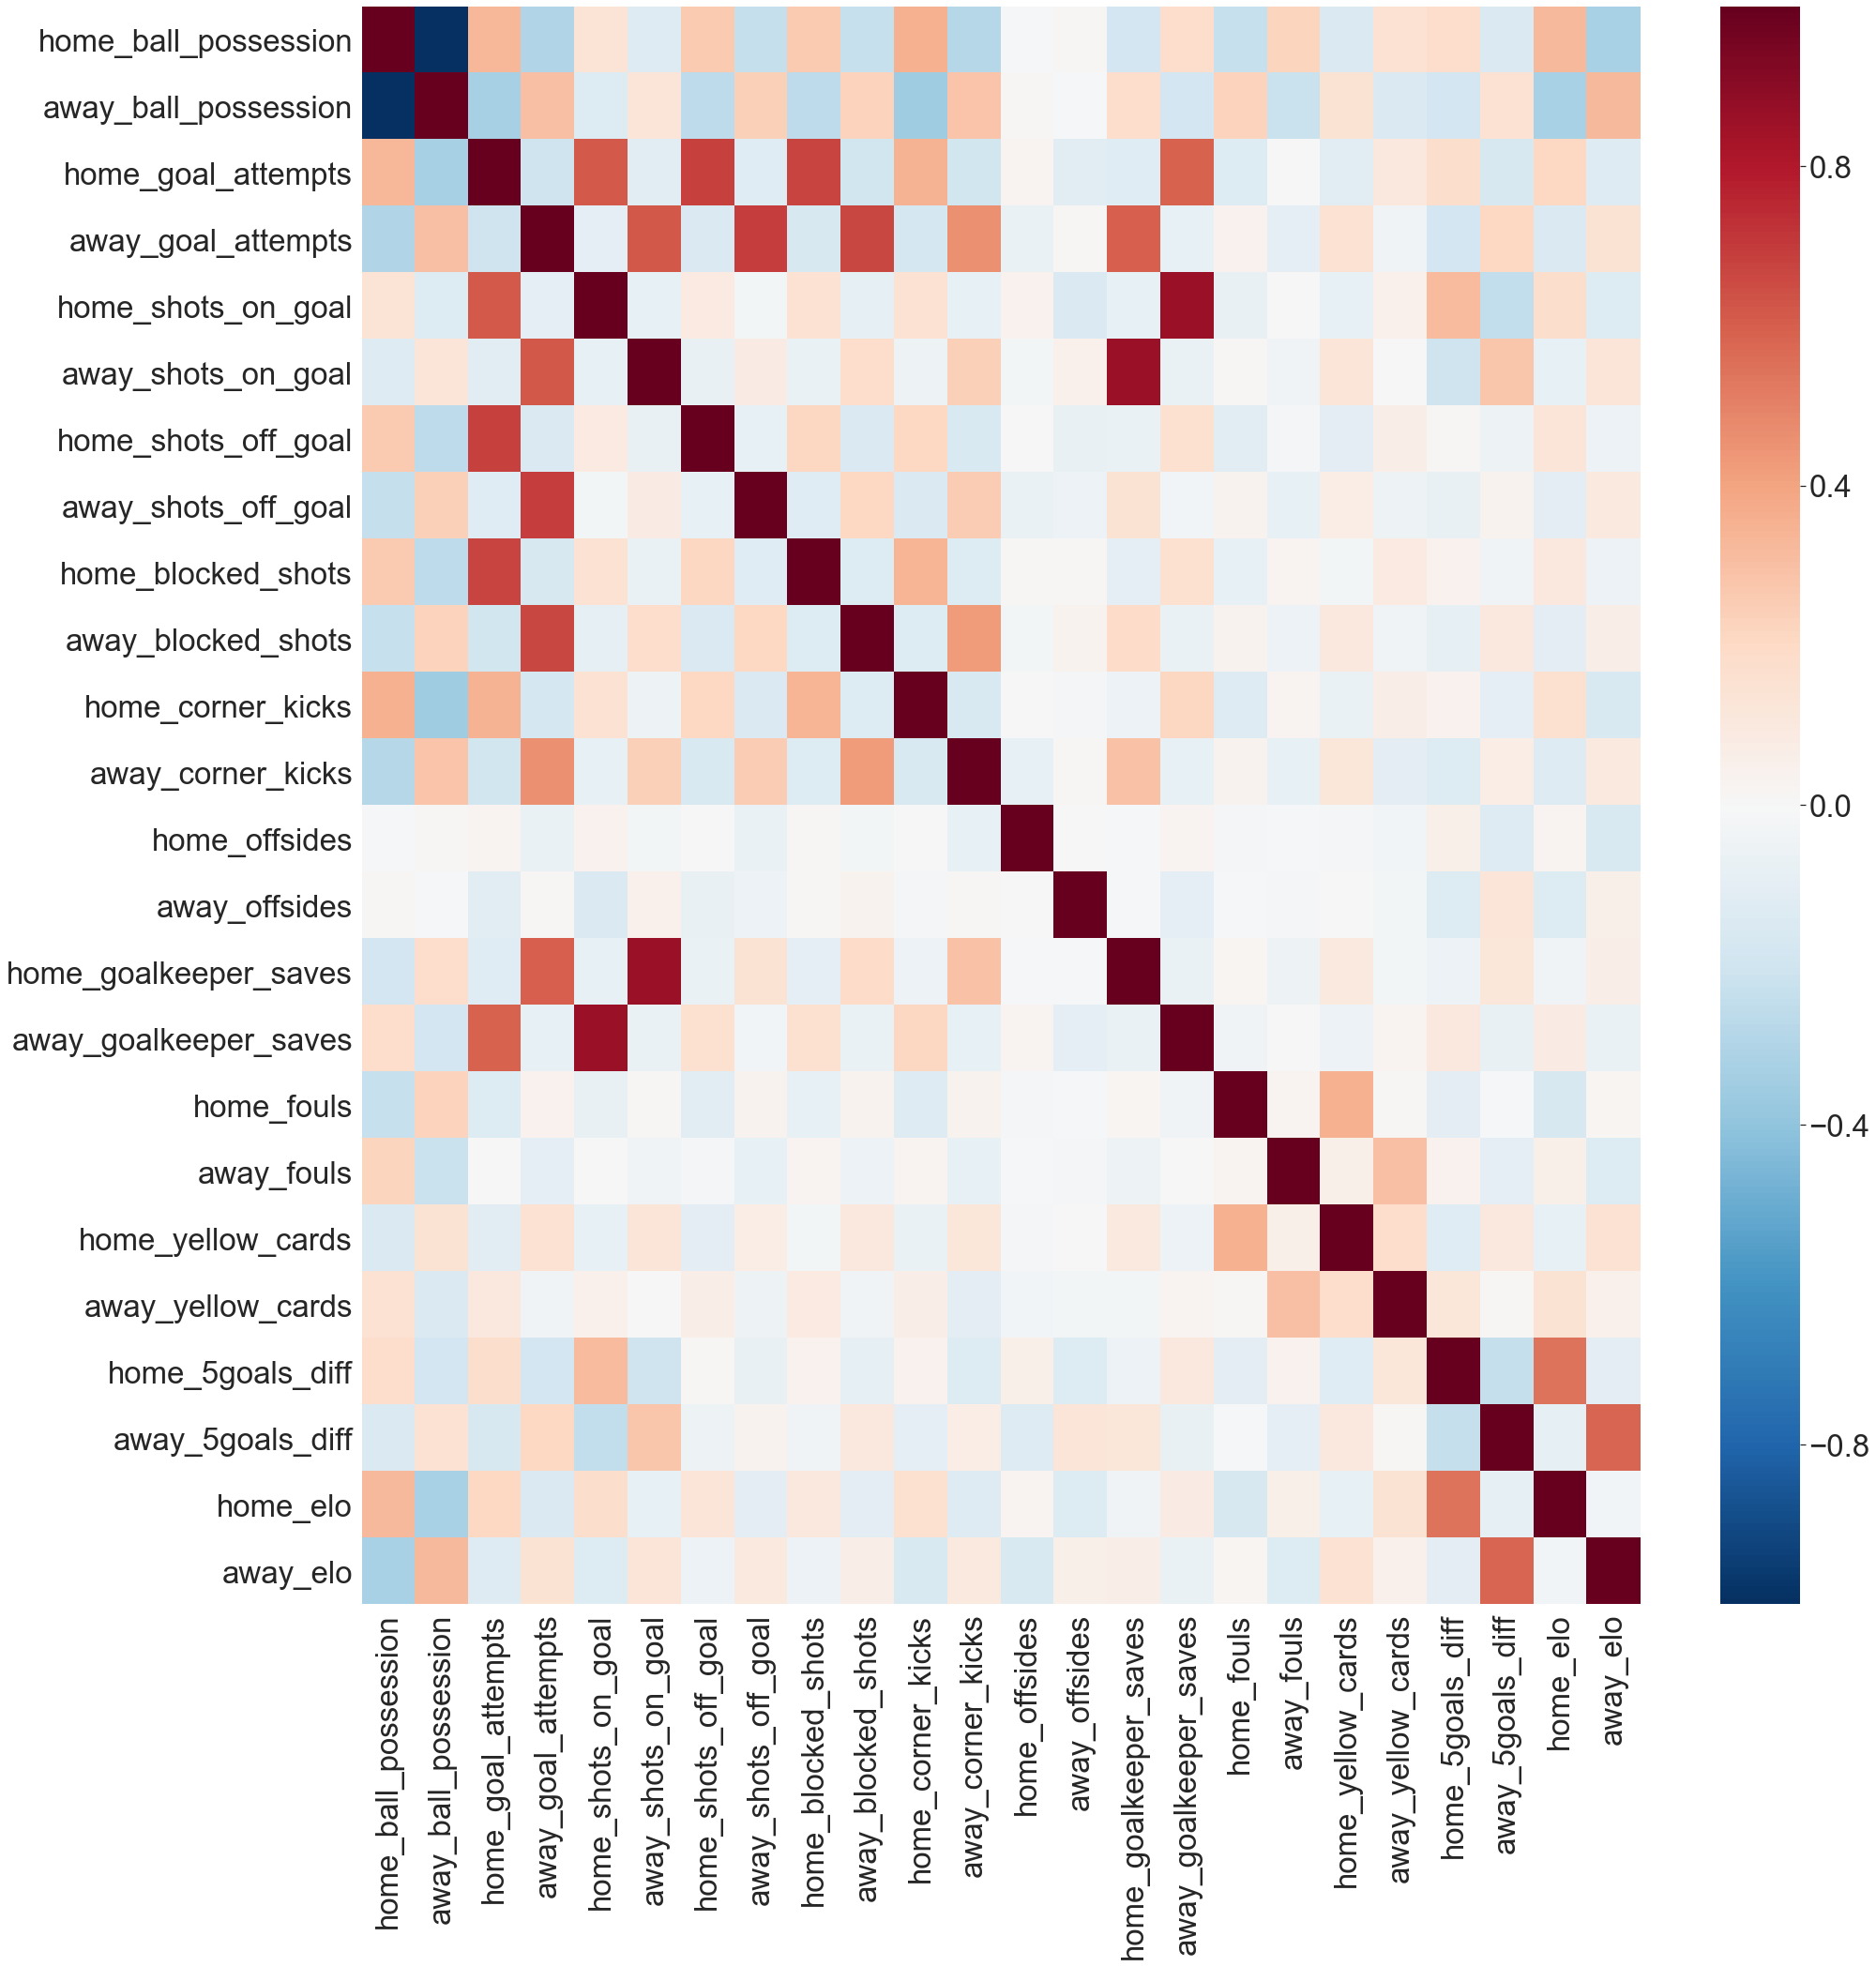

In [14]:
X_cor = X.corr()
plt.figure(figsize=(30,30))
sns.set(font_scale=3)
ax = sns.heatmap(X_cor,cmap = "RdBu_r", linecolor='white',vmin=-1, vmax=1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.savefig('correlacao.pdf')
plt.show()

In [15]:
X.describe()

,home_ball_possession,away_ball_possession,home_goal_attempts,away_goal_attempts,home_shots_on_goal,away_shots_on_goal,home_shots_off_goal,away_shots_off_goal,home_blocked_shots,away_blocked_shots,home_corner_kicks,away_corner_kicks,home_offsides,away_offsides,home_goalkeeper_saves,away_goalkeeper_saves,home_fouls,away_fouls,home_yellow_cards,away_yellow_cards,home_5goals_diff,away_5goals_diff,home_elo,away_elo
count,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00
mean,51.50,48.50,13.65,11.32,4.43,3.72,5.54,4.59,3.68,3.01,5.71,4.73,1.62,1.71,2.53,2.96,11.70,12.46,1.63,1.95,1.46,-1.43,"1,478.87","1,477.68"
std,10.50,10.50,4.76,4.33,2.35,2.12,2.56,2.40,2.31,2.02,2.76,2.56,1.41,1.48,1.73,1.98,3.54,3.67,1.23,1.32,4.23,4.09,68.89,68.52
min,8.00,22.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,-13.00,-13.00,"1,315.37","1,312.92"
25%,44.00,41.00,11.00,8.00,3.00,2.00,4.00,3.00,2.00,2.00,4.00,3.00,1.00,1.00,1.00,2.00,9.00,10.00,1.00,1.00,-1.00,-4.00,"1,425.59","1,426.70"
50%,52.00,48.00,13.00,11.00,4.00,3.00,5.00,4.00,3.00,3.00,5.00,4.00,1.00,1.00,2.00,3.00,12.00,12.00,1.00,2.00,1.00,-2.00,"1,487.79","1,487.47"
75%,59.00,56.00,16.00,14.00,6.00,5.00,7.00,6.00,5.00,4.00,8.00,6.00,2.00,3.00,4.00,4.00,14.00,15.00,2.00,3.00,4.00,1.00,"1,529.53","1,526.39"
max,78.00,92.00,36.00,28.00,15.00,12.00,16.00,15.00,13.00,12.00,15.00,16.00,7.00,9.00,11.00,12.00,23.00,25.00,6.00,7.00,15.00,10.00,"1,627.03","1,636.56"


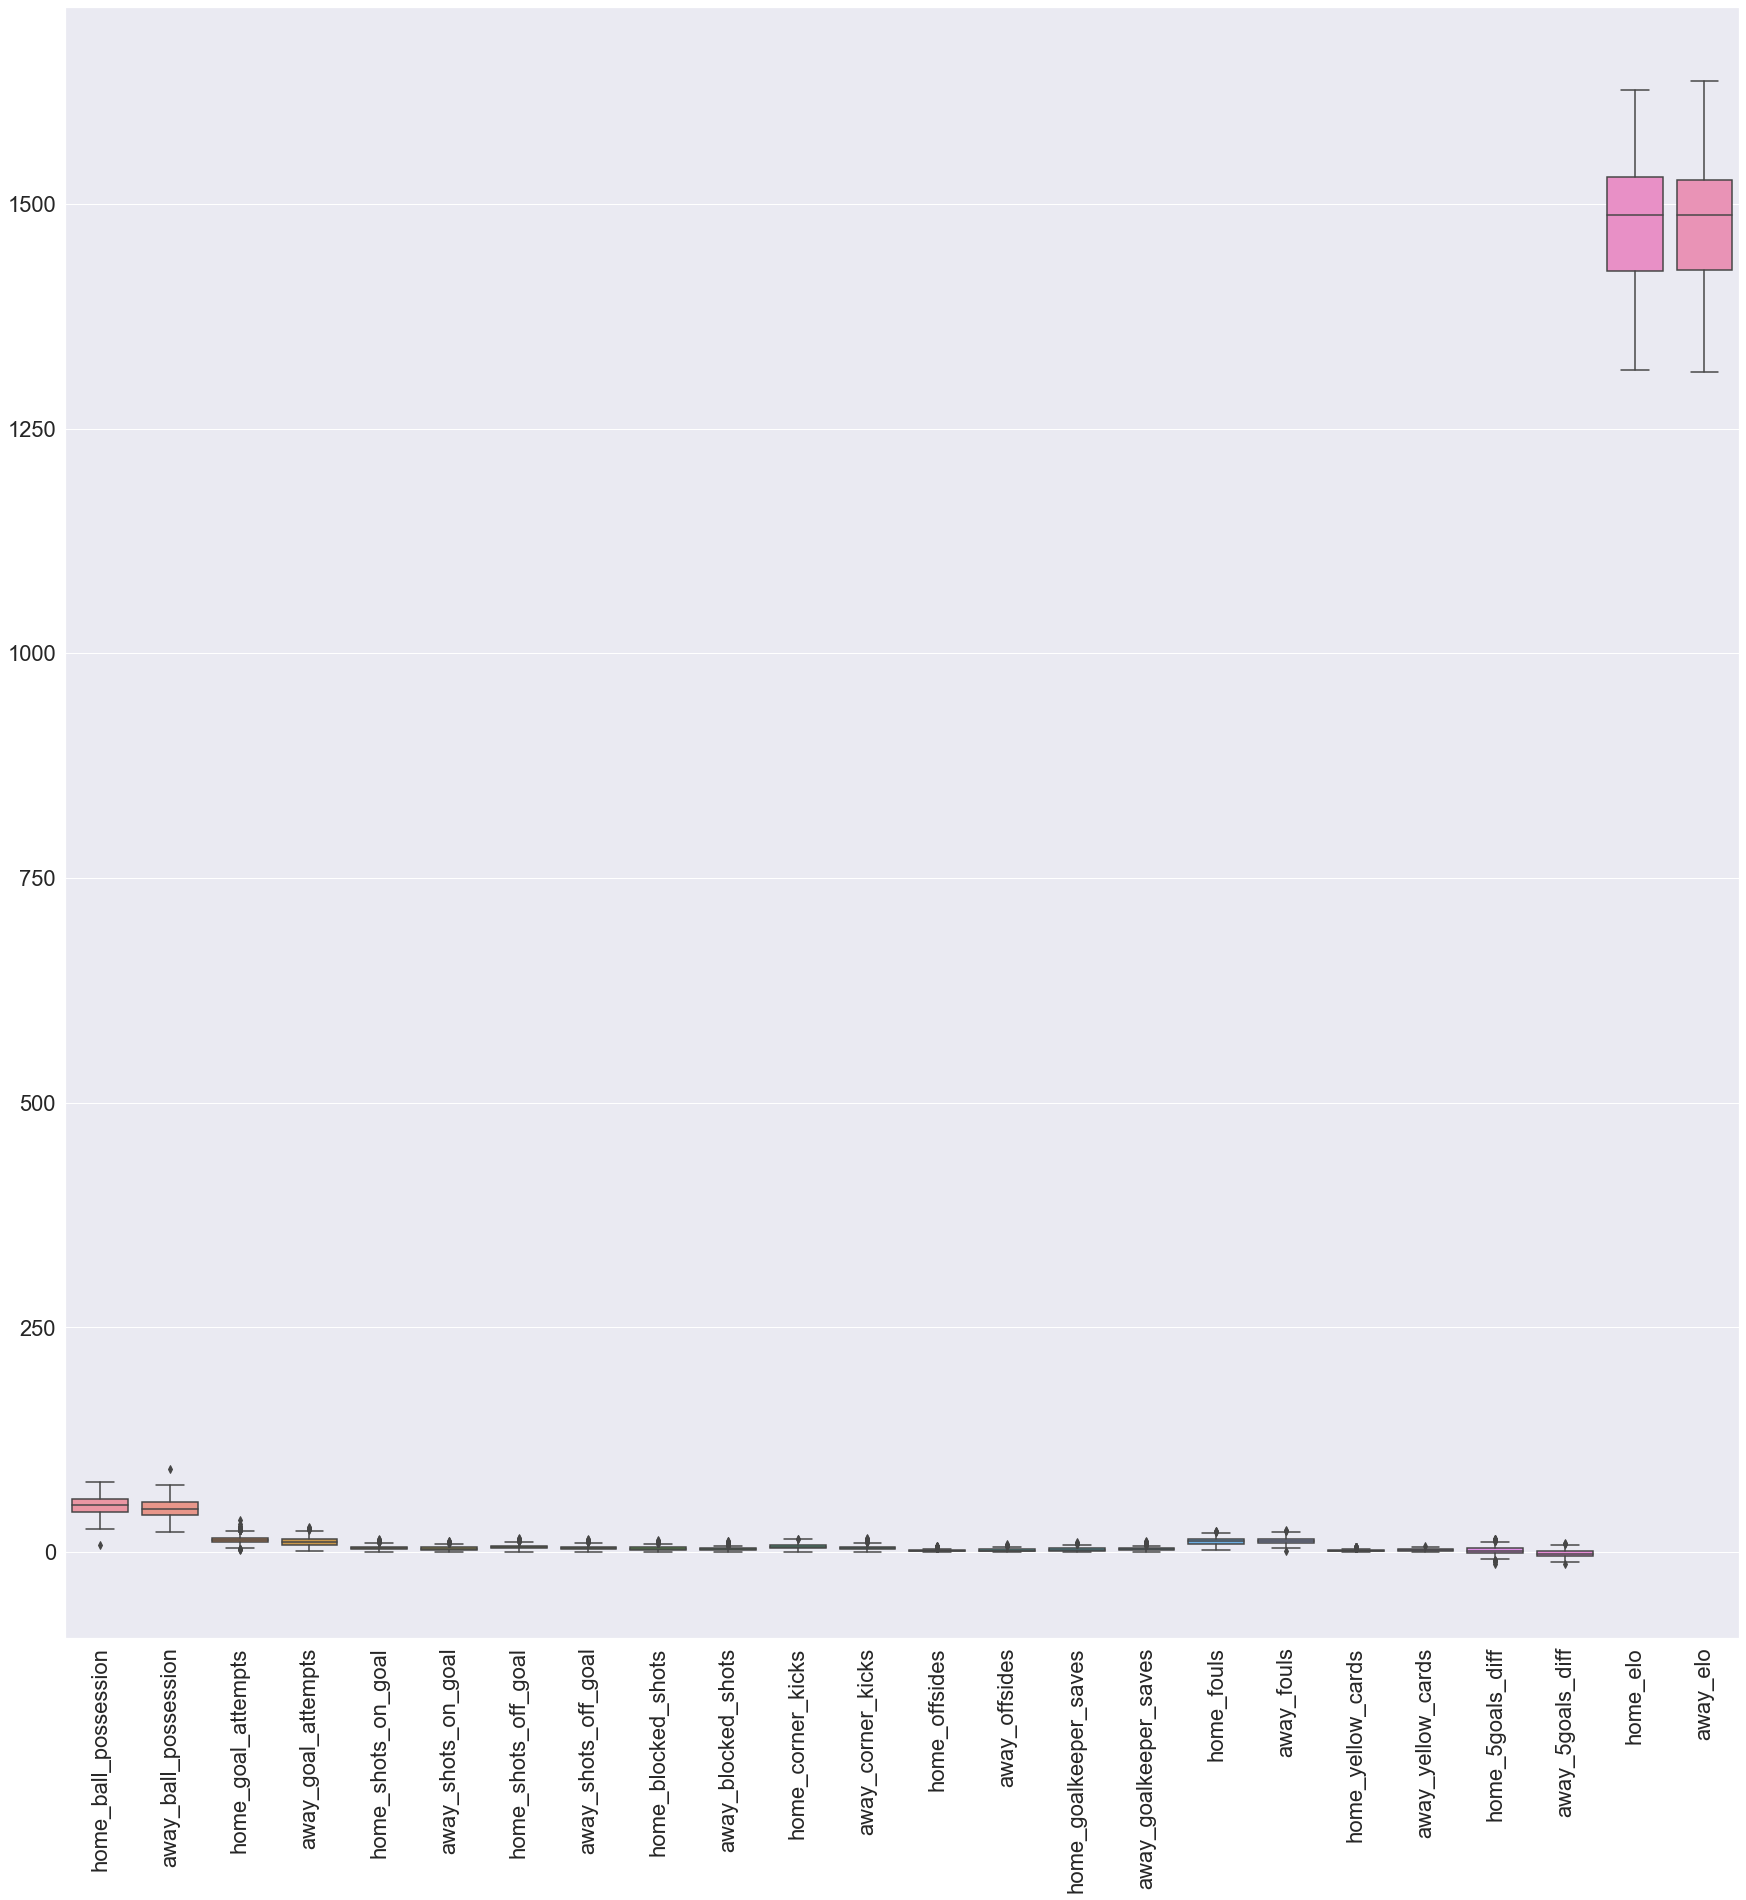

In [16]:
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
ax = sns.boxplot(data = X)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [17]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [18]:
pd.DataFrame(scaled_X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
count,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00,798.00
mean,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-4.14,-2.52,-2.45,-2.39,-1.89,-1.76,-2.16,-1.92,-1.60,-1.49,-2.07,-1.85,-1.15,-1.16,-1.46,-1.50,-2.74,-3.12,-1.33,-1.48,-3.42,-2.83,-2.37,-2.41
25%,-0.71,-0.71,-0.56,-0.77,-0.61,-0.81,-0.60,-0.66,-0.73,-0.50,-0.62,-0.68,-0.44,-0.48,-0.88,-0.49,-0.76,-0.67,-0.51,-0.72,-0.58,-0.63,-0.77,-0.74
50%,0.05,-0.05,-0.14,-0.07,-0.18,-0.34,-0.21,-0.25,-0.29,-0.01,-0.26,-0.28,-0.44,-0.48,-0.30,0.02,0.08,-0.12,-0.51,0.04,-0.11,-0.14,0.13,0.14
75%,0.71,0.71,0.49,0.62,0.67,0.61,0.57,0.59,0.57,0.49,0.83,0.50,0.27,0.87,0.85,0.52,0.65,0.69,0.30,0.79,0.60,0.59,0.74,0.71
max,2.52,4.14,4.70,3.86,4.51,3.91,4.08,4.35,4.05,4.45,3.36,4.40,3.81,4.92,4.89,4.57,3.19,3.42,3.56,3.82,3.20,2.80,2.15,2.32


In [20]:
pca = PCA(24)
pca.fit(scaled_X)
variance = pca.explained_variance_ratio_
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=7)*100)
var

array([ 20.1825 ,  30.34715,  38.14219,  45.27658,  51.51547,  57.4358 ,
        62.55048,  67.20622,  71.32007,  75.27438,  78.86167,  82.29213,
        85.67963,  88.54039,  91.20119,  93.7554 ,  95.95938,  97.65284,
        99.12899,  99.69956, 100.     , 100.     , 100.     , 100.     ])

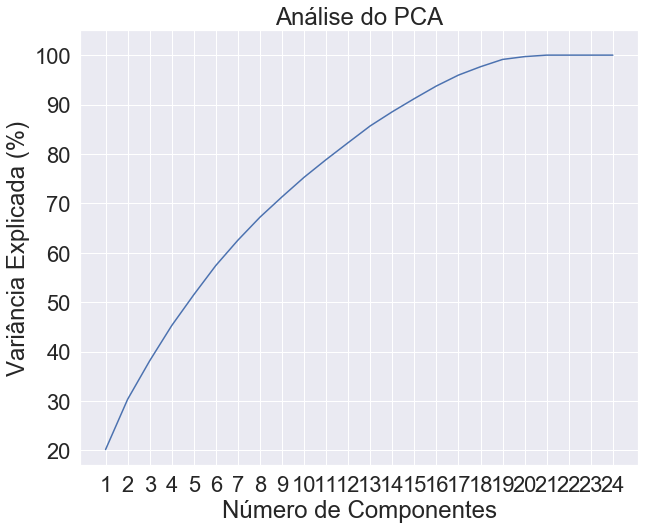

In [22]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set(xlabel = 'Número de Componentes', ylabel= 'Variância Explicada (%)', title = 'Análise do PCA', xticks=list(range(1,25)))
lp = sns.lineplot(x=list(range(1,25)), y=var, ax=ax1)
axes = lp.axes
axes.set_ylim(17,105)
plt.show()

In [23]:
pca = PCA(.99)
pca.fit(scaled_X)
data = pca.transform(scaled_X)
print(f'Percentual de variância explicada por cada componente: {np.round(pca.explained_variance_ratio_*100,3)}')
print(f'Percentual total de variância explicada pelas componente: {np.round(pca.explained_variance_ratio_*100,3).sum():.3f}%')

Percentual de variância explicada por cada componente: [20.183 10.165  7.795  7.134  6.239  5.92   5.115  4.656  4.114  3.954
  3.587  3.43   3.387  2.861  2.661  2.554  2.204  1.693  1.476]
Percentual total de variância explicada pelas componente: 99.128%


In [24]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(data, y_scaled, test_size=0.1)

In [25]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [26]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

## RandomForest - Teste Inicial

In [27]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 42)
scores = []
past_score = 0

for train_index, test_index in skf.split(X_train, y_train):
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
    rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
    rf.fit(X_tr, y_tr.values.flatten())
    y_pred = rf.predict(X_val)
    score = accuracy_score(y_pred, y_val)
    scores.append(score)
    if score > past_score:
        print(f'A acurácia atual é {100 * score:.2f}, a acurácia passada era {100 * past_score:.2f}.')
        with open('rf_model.pkl','wb') as f:
            pickle.dump(rf, f)
        past_score = score

A acurácia atual é 58.11, a acurácia passada era 0.00.
A acurácia atual é 63.01, a acurácia passada era 58.11.
A acurácia atual é 63.38, a acurácia passada era 63.01.
A acurácia atual é 66.20, a acurácia passada era 63.38.


In [28]:
scores

[0.581081081081081,
 0.5205479452054794,
 0.6301369863013698,
 0.4861111111111111,
 0.6056338028169014,
 0.6338028169014085,
 0.5070422535211268,
 0.5915492957746479,
 0.5211267605633803,
 0.6619718309859155]

In [29]:
print(f'Média da acurácia nos 10 folds: {100 * np.mean(scores):.2f}%')
print(f'Desvio padrão da acurácia nos 10 folds: {100 * np.std(scores):.2f}%')

Média da acurácia nos 10 folds: 57.39%
Desvio padrão da acurácia nos 10 folds: 5.80%


In [30]:
def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10)):
    # Function by hitvoice
    # https://gist.github.com/hitvoice/36cf44689065ca9b927431546381a3f7
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
    y_true:    true label of the data, with shape (nsamples,)
    y_pred:    prediction of the data, with shape (nsamples,)
    filename:  filename of figure file to save
    labels:    string array, name the order of class labels in the confusion matrix.
                use `clf.classes_` if using scikit-learn models.
                with shape (nclass,).
    ymap:      dict: any -> string, length == nclass.
                if not None, map the labels & ys to more understandable strings.
                Caution: original y_true, y_pred and labels must align.
    figsize:   the size of the figure plotted.
    """
    sns.set_context("notebook")
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    sns.set(font_scale=1.5)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Real'
    cm.columns.name = 'Predito'
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='Blues')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.tight_layout()
    plt.savefig(filename, dpi=300)

array(['A', 'D', 'H'], dtype=object)

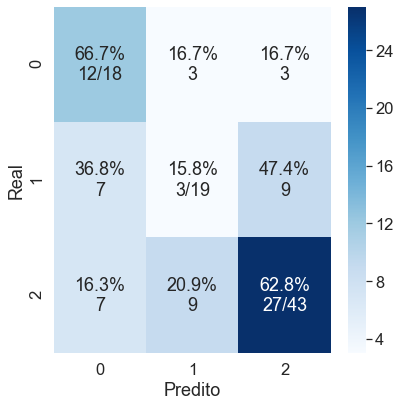

In [31]:
with open('rf_model.pkl','rb') as f:
    rf_model = pickle.load(f)
y_pred = rf_model.predict(X_test)
cm_analysis(y_test.values, y_pred, 'cm_rf.pdf', rf_model.classes_, figsize=(6,6))
le.inverse_transform([0, 1, 2])

## RandomForest - Hyperparametrização

In [32]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Division criterion
criterion = ['entropy', 'gini']
# Create the random grid
random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [33]:
random_grid

{'criterion': ['entropy', 'gini'],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 15, 20],
 'min_samples_leaf': [1, 2, 4, 6, 8, 10],
 'bootstrap': [True, False]}

In [34]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, n_jobs = -1, random_state = 42)
# Fit the random search model
rf_random.fit(data, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.0min finished
/home/gabriel/.pyenv/versions/3.7.4/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [35]:
rf_random.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30,
 'criterion': 'gini',
 'bootstrap': False}

In [36]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 42)
scores = []
past_score = 0

for train_index, test_index in skf.split(X_train, y_train):
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
    rf = RandomForestClassifier(n_estimators = 40, min_samples_split = 2,
                                min_samples_leaf = 2, max_features = 'auto', random_state = 42,
                                max_depth = 30, criterion = 'gini', bootstrap = False)
    rf.fit(X_tr, y_tr.values.flatten())
    y_pred = rf.predict(X_val)
    score = accuracy_score(y_pred, y_val)
    scores.append(score)
    if score > past_score:
        print(f'A acurácia atual é {100 * score:.2f}, a acurácia passada era {100 * past_score:.2f}.')
        with open('rf_model_hyper.pkl','wb') as f:
            pickle.dump(rf, f)
        past_score = score

A acurácia atual é 60.81, a acurácia passada era 0.00.
A acurácia atual é 61.64, a acurácia passada era 60.81.
A acurácia atual é 69.86, a acurácia passada era 61.64.


In [37]:
scores

[0.6081081081081081,
 0.6164383561643836,
 0.6986301369863014,
 0.625,
 0.6901408450704225,
 0.6338028169014085,
 0.5492957746478874,
 0.6619718309859155,
 0.5633802816901409,
 0.5774647887323944]

In [38]:
print(f'Média da acurácia nos 10 folds: {100 * np.mean(scores):.2f}%')
print(f'Desvio padrão da acurácia nos 10 folds: {100 * np.std(scores):.2f}%')

Média da acurácia nos 10 folds: 62.24%
Desvio padrão da acurácia nos 10 folds: 4.82%


array(['A', 'D', 'H'], dtype=object)

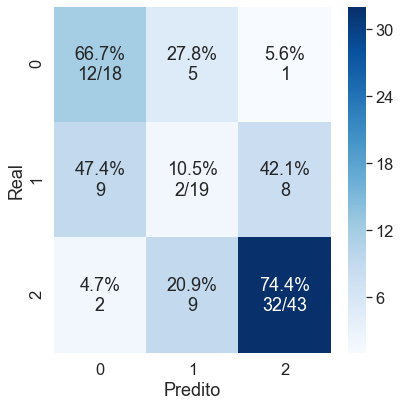

In [39]:
with open('rf_model_hyper.pkl','rb') as f:
    rf_model = pickle.load(f)
y_pred = rf_model.predict(X_test)
cm_analysis(y_test.values, y_pred, 'cm_rf_hyper.pdf', rf_model.classes_, figsize=(6,6))
le.inverse_transform([0, 1, 2])

## LogisticRegression

In [40]:
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
warm_start = [True, False]
C = [0.2, 0.4, 0.6, 0.8, 1.0]
random_grid = {'penalty': penalty,
               'solver': solver,
               'warm_start': warm_start,
               'C': C}

In [41]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
lr1_random = RandomizedSearchCV(estimator = lr1, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, n_jobs = -1, random_state = 42)
# Fit the random search model
lr1_random.fit(data, y)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


/home/gabriel/.pyenv/versions/3.7.4/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.6s finished
/home/gabriel/.pyenv/versions/3.7.4/envs/data_science/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=42,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.2, 0.4, 0.6, 0.8, 1.0],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga'],
                                        'warm_start': [True, Fal

In [42]:
lr1_random.best_params_

{'warm_start': True, 'solver': 'liblinear', 'penalty': 'l2', 'C': 0.2}

In [43]:
clf1 = LogisticRegression(random_state=42, warm_start = True, solver = 'liblinear', penalty = 'l2', multi_class = 'auto', C = 0.2)
clf1.fit(X_train, y_train.values.ravel())
clf1.score(X_test, y_test)

0.65

In [44]:
penalty = ['l2', 'none']
solver = ['newton-cg', 'lbfgs', 'sag', 'saga']
warm_start = [True, False]
C = [0.2, 0.4, 0.6, 0.8, 1.0]
random_grid = {'penalty': penalty,
               'solver': solver,
               'warm_start': warm_start,
               'C': C}

In [45]:
from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
lr2_random = RandomizedSearchCV(estimator = lr2, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, n_jobs = -1, random_state = 42)
# Fit the random search model
lr2_random.fit(data, y)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


/home/gabriel/.pyenv/versions/3.7.4/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    8.0s finished
/home/gabriel/.pyenv/versions/3.7.4/envs/data_science/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=42,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.2, 0.4, 0.6, 0.8, 1.0],
                                        'penalty': ['l2', 'none'],
                                        'solver': ['newton-cg', 'lbfgs', 'sag',
                                                   'sag

In [46]:
lr2_random.best_params_

{'warm_start': True, 'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.2}

In [49]:
clf2 = LogisticRegression(random_state=42, warm_start = True, solver = 'newton-cg', penalty = 'l2', C = 0.2, multi_class = 'auto')
clf2.fit(X_train, y_train.values.ravel())
clf2.score(X_test, y_test)

0.65

In [51]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 42)
scores = []
past_score = 0

for train_index, test_index in skf.split(X_train, y_train):
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
    lr = LogisticRegression(random_state=42, warm_start = True, 
                            solver = 'newton-cg', penalty = 'l2', multi_class = 'auto', C=0.2)
    lr.fit(X_tr, y_tr.values.flatten())
    y_pred = lr.predict(X_val)
    score = accuracy_score(y_pred, y_val)
    scores.append(score)
    if score > past_score:
        print(f'A acurácia atual é {100 * score:.2f}, a acurácia passada era {100 * past_score:.2f}.')
        with open('lr_model_hyper.pkl','wb') as f:
            pickle.dump(lr, f)
        past_score = score

A acurácia atual é 70.27, a acurácia passada era 0.00.


In [52]:
scores

[0.7027027027027027,
 0.6438356164383562,
 0.6575342465753424,
 0.5555555555555556,
 0.676056338028169,
 0.6197183098591549,
 0.5492957746478874,
 0.647887323943662,
 0.6056338028169014,
 0.6338028169014085]

In [53]:
print(f'Média da acurácia nos 10 folds: {100 * np.mean(scores):.2f}%')
print(f'Desvio padrão da acurácia nos 10 folds: {100 * np.std(scores):.2f}%')

Média da acurácia nos 10 folds: 62.92%
Desvio padrão da acurácia nos 10 folds: 4.63%


array(['A', 'D', 'H'], dtype=object)

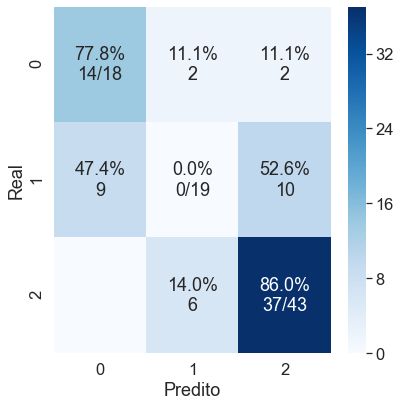

In [54]:
with open('lr_model_hyper.pkl','rb') as f:
    lr_model = pickle.load(f)
y_pred = lr_model.predict(X_test)
cm_analysis(y_test.values, y_pred, 'cm_rf_hyper.pdf', lr_model.classes_, figsize=(6,6))
le.inverse_transform([0, 1, 2])